Úloha 1 

Lineárna filtrácia obrazu v priestorovej doméne

Vykonajte filtráciu obrazu v priestorovej doméne s vyuzitím konvolúcie. Pouzite nasledovné filtre:

• Gaussov filter
• Sobelov filter
• Laplacov filter

Postupujte nasledovne:
1. Nacítajte si ľubovolný obrázok (imread).
2. Prevedte si obrázok na grayscale (rgb2gray).
a. Dobrovolné: Môzete robit aj s farebným rgb obrázkom (3 kanály).
3. Vytvorte si maticu filtra pre konvolúciu (pomôcka: fspecial).
4. Vykonajte konvolúciu (conv2).

V úlohe vizualizujte pôvodný obrázok a výstupy po filtrácii.

Posudte ci pouzite filtracne jadra pri konvolucii su LP alebo HP! Zdôvodnite !

Postup vhodne dokumentuje (Code/Text bloky)!

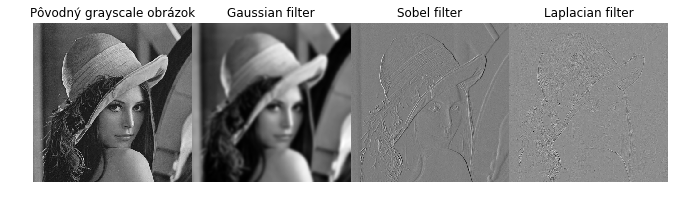

In [2]:
import numpy as np
import scipy
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import fftpack
from skimage.color import rgb2gray

#Nacítanie obrázka
img=mpimg.imread('lena.png')

#Prevod na grayscale
gray = rgb2gray(img)   

#Gaussov, Sobelov a Laplacian filter
gauss = ndimage.gaussian_filter(gray, sigma=4)
sobel = ndimage.sobel(gray)
laplac = ndimage.laplace(gray)

#Vizualizácia pôvodného obrázka a 3 filtrov
plt.figure(figsize=(9, 3))

plt.subplot(141)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.title("Pôvodný grayscale obrázok")
plt.axis('off')

plt.subplot(142)
plt.imshow(gauss, cmap=plt.cm.gray)
plt.title("Gaussian filter")
plt.axis('off')

plt.subplot(143)
plt.imshow(sobel, cmap=plt.cm.gray)
plt.title("Sobel filter")
plt.axis('off')

plt.subplot(144)
plt.imshow(laplac, cmap=plt.cm.gray)
plt.title("Laplacian filter")
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01,
                    left=0.01, right=0.99)

plt.show()

Posudte ci pouzite filtracne jadra pri konvolucii su LP alebo HP! Zdôvodnite !


Gaussov filter - je to LP filter, ponecháva frekvencie nizsiie ako je prahová hodnota(cut-off frequency),
teda zvýraznuje ich a vyssie frekvencie zoslabuje, preto je aj obraz pomerne dobre viditeľný narozdiel
od HP filtrov, keďze obrazy majú zvycajne nizsie frekvencie. Tento filter odstránil drobné detaily z
obrazu, takze sme získali rozmazaný obraz bez drobných detailov, čo je mozné vidiet vo vizualizácií.


Sobelov a Laplacian filter - oba sú HP filtre, frekvencie vyssie ako je prahová hodnota sa ponechajú a
tie nizsie sa zoslabia, vo vizualizácií je to možné vidiet tým, ze sa tam nachádza efekt rozvlnenia.

In [ ]:
#Uloha 2

Úloha 2 

Filtrácia obrazu v spektrálnej doméne

Vykonajte nasledovné filtrácie obrazu v spektrálnej doméne:

• Ideálny HP filter
• Ideálny LP filter
• Gaussov HP filter
• Gaussov LP filter

Postupujte nasledovne:

1. Nacítajte si obrázok a preveďte ho na grayscale (dobrovolné: RGB).
2. Vypocítajte Fourierovu transformáciu nad obrázkom (fft2).
3. Správne si posunte spektrum (prehodenie kvadrantov) (fftshift).
4. Vytvorte si ideálny filter (pomôcka: definícia funkcie pre kruh s využitím polomeru a stredového bodu).
5. Vykonajte filtráciu. (násobenie)
6. Inverzne posunte spektrum (ifftshift).
7. Vykonajte spätnú transformáciu (ifft2) a vizualizujte obrázok.

Rovnako postupujte aj pri ostatných filtroch. Pri vytvaraní Gaussovho filtra cez fspecial si správne naskálujte
filter (pozn. min = 0, max = 1). Vizualizujte aj jednotlivé filtre, ktoré ste vytvorili v tejto úlohe. Porovnajte a
zhodnodte vplyv jednotlivých filtrov na výsledné vizualizácie.

(-0.5, 511.5, 511.5, -0.5)

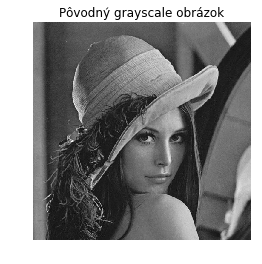

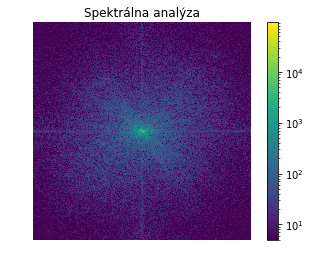

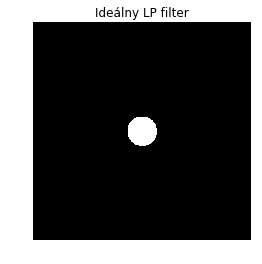

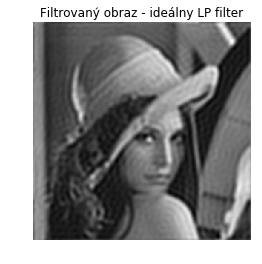

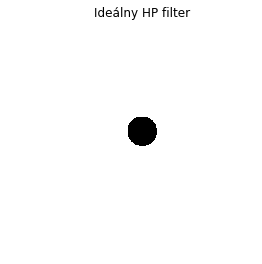

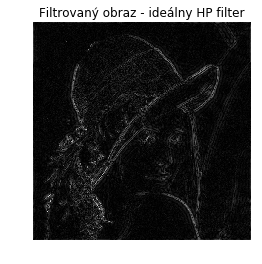

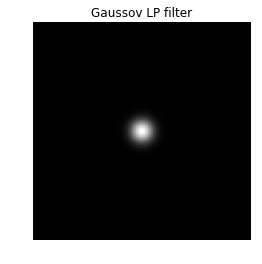

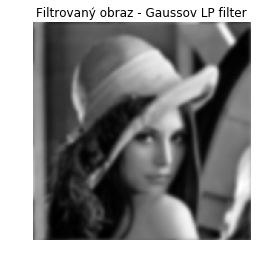

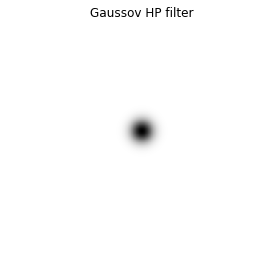

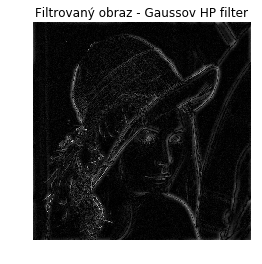

In [74]:
import numpy as np
import scipy
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import fftpack
from skimage.color import rgb2gray
import scipy.stats as st
import cv2
from skimage import util

#Nacítanie obrázka
img=mpimg.imread('lena.png')

#Prevod na grayscale
gray = rgb2gray(img)

plt.figure()
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.title("Pôvodný grayscale obrázok")
plt.axis('off')

#Výpocet Fouriérovej tranformácie a posunutie spektra
im_fft = fftpack.fft2(np.double(gray))
im_fft = fftpack.fftshift(im_fft)

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
    
plt.figure()
plot_spectrum(im_fft)
plt.title('Spektrálna analýza')
plt.axis('off')

lp = np.zeros([512,512,3],dtype=np.uint8)
lp.fill(0);

#Vytvorenie ideálneho LP filtra
for i in range(512):
    for j in range(512):
        if ((i - 256)*(i-256) + (j - 256)*(j-256)) < 1225:
            lp[i][j] = 255;
        
lp = rgb2gray(lp)

#Vizualizácia LP filtra
plt.figure()
plt.imshow(lp, cmap=plt.cm.gray)
plt.title('Ideálny LP filter')
plt.axis('off')

#Filtrácia
im_fft2 = np.multiply(lp,im_fft)

#Inverzné posunutia filtra
im_fft2 = fftpack.ifftshift(im_fft2)
im_fft2 = abs(fftpack.ifft2(im_fft2))

#Vizualizácia filtrovaného obrazu
plt.figure()
plt.imshow((im_fft2),cmap=plt.cm.gray)
plt.title('Filtrovaný obraz - ideálny LP filter')
plt.axis('off')

hp = np.zeros([512,512,3],dtype=np.uint8)
hp.fill(255);

#Vytvorenie ideálneho HP filtra
for i in range(512):
    for j in range(512):
        if ((i - 256)*(i-256) + (j - 256)*(j-256)) < 1225:
            hp[i][j] = 0;
            
hp = rgb2gray(hp)
        
#Vizualizácia HP filtra  
plt.figure()
plt.imshow(hp, cmap=plt.cm.gray)
plt.title('Ideálny HP filter')
plt.axis('off')

#Filtrácia
im_fft3 = np.multiply(hp,im_fft)

#Inverzné posunutia filtra
im_fft3 = fftpack.ifftshift(im_fft3)
im_fft3 = abs(fftpack.ifft2(im_fft3))

#Vizualizácia filtrovaného obrazu
plt.figure()
plt.imshow((im_fft3),cmap=plt.cm.gray)
plt.title('Filtrovaný obraz - ideálny HP filter')
plt.axis('off')

#Gaussov filter
def gkern(kernlen=11, nsig=20):

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return 255-kernel


gaussLP = gkern(512)
gaussLP = rgb2gray(gaussLP)

gaussLP = (255-gaussLP)

plt.figure()
plt.imshow(gaussLP, cmap=plt.cm.gray)
plt.title('Gaussov LP filter')
plt.axis('off')

#Filtrácia
im_fft4 = np.multiply(gaussLP,im_fft)

#Inverzné posunutia filtra
im_fft4 = fftpack.ifftshift(im_fft4)
im_fft4 = abs(fftpack.ifft2(im_fft4))

#Vizualizácia filtrovaného obrazu
plt.figure()
plt.imshow((im_fft4),cmap=plt.cm.gray)
plt.title('Filtrovaný obraz - Gaussov LP filter')
plt.axis('off')

gaussHP = gkern(512)
gaussHP = rgb2gray(gaussHP)

gaussHP = gaussHP - np.amin(np.amin(gaussHP))
gaussHP = gaussHP / (np.amax(np.amax(gaussHP)) - np.amin(np.amin(gaussHP)))

plt.figure()
plt.imshow(gaussHP, cmap=plt.cm.gray)
plt.title('Gaussov HP filter')
plt.axis('off')

#Filtrácia
im_fft5 = np.multiply(gaussHP,im_fft)

#Inverzné posunutia filtra
im_fft5 = fftpack.ifftshift(im_fft5)
im_fft5 = abs(fftpack.ifft2(im_fft5))

#Vizualizácia filtrovaného obrazu
plt.figure()
plt.imshow((im_fft5),cmap=plt.cm.gray)
plt.title('Filtrovaný obraz - Gaussov HP filter')
plt.axis('off')


Porovnajte a zhodnodte vplyv jednotlivých filtrov na výsledné vizualizácie.

Porovnanie HP a LP filtra samostatne:

HP filter umoznuje prechod vysokých frekvencií, zatial co blokuje tie nizsie. LP filter funguje presne naopak.
Ako je mozné vidiet na obrázku, tak LP filter nám vytvoril na obraze jeho rozmazanie. HP filter zase slúzi
na odsránenie šumu z obrazu, ale keďze v pôvodnom obraze nie je žiadny sum s nízkou frekvenciou, tak je
mozné vidiet len vysoké frekvencie, ktoré nám zvýraznili vlastnosti(features)/obrysy objektov v obraze. LP
filter nám tiez odstránil drobné detaily z obrazu.

Porovnanie ideálneho HP(LP) filtra a Gaussovho HP(LP) filtra:

Ak porovnáme ideálny HP filter s Gaussian HP a tiež ideálny LP filter a Gaussian LP filter, tak je mozné
vidieť, ze výsledná filtrácia je velmi podobná. Gaussov filter je o niečo jemnejsí, keďze nevytvára
vlnenie(ringing effect) a taktiez má plynulý prechod.